In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
df_1 = pd.read_excel('Data Analyst Assignment (1).xlsx','Assignment-1')

In [104]:
for column in df_1.columns:
    print(column,'=',df_1[column].nunique())

Date = 257
product = 1
phase = 1
campaign_platform = 2
campaign_type = 2
communication_medium = 2
subchannel = 4
audience_type = 4
creative_type = 3
creative_name = 4
device = 4
age = 7
spends = 9087
impressions = 1188
clicks = 263
link_clicks = 160


In [105]:
for column in df_1.columns:
    print(column,'=',len(df_1[df_1[column].isna()==True]))

Date = 0
product = 0
phase = 0
campaign_platform = 0
campaign_type = 0
communication_medium = 0
subchannel = 0
audience_type = 0
creative_type = 0
creative_name = 0
device = 0
age = 0
spends = 0
impressions = 0
clicks = 0
link_clicks = 546


In [106]:
df_1.drop(columns=['Date','product','phase'],inplace=True)

In [86]:
df_1.describe()

,spends,impressions,clicks,link_clicks
count,16834.000000,16834.000000,16834.000000,16288.000000
mean,148.694236,287.959190,11.977783,2.170371
std,483.895724,2444.450313,44.796963,18.659132
min,0.000000,0.000000,0.000000,0.000000
25%,0.180000,3.000000,0.000000,0.000000
50%,22.535000,13.000000,2.000000,0.000000
75%,110.020000,64.000000,8.000000,0.000000
max,9221.960000,67454.000000,1075.000000,450.000000


In [81]:
df_1.isna().sum()

campaign_platform         0
campaign_type             0
communication_medium      0
subchannel                0
audience_type             0
creative_type             0
creative_name             0
device                    0
age                       0
spends                    0
impressions               0
clicks                    0
link_clicks             546
dtype: int64

In [107]:
len(df_1[df_1.duplicated(keep='first')])
#df_1 = df_1.drop_duplicates(keep='first')

3570

In [108]:
df_1 = df_1.drop_duplicates(keep='first')
len(df_1[df_1.duplicated(keep='first')])

0

In [7]:
len(df_1[df_1.isna().any(axis=1)])
#df_1['link_clicks'].fillna(np.median(df_1['link_clicks']))

533

In [88]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13264 entries, 0 to 16833
Data columns (total 13 columns):
campaign_platform       13264 non-null object
campaign_type           13264 non-null object
communication_medium    13264 non-null object
subchannel              13264 non-null object
audience_type           13264 non-null object
creative_type           13264 non-null object
creative_name           13264 non-null object
device                  13264 non-null object
age                     13264 non-null object
spends                  13264 non-null float64
impressions             13264 non-null int64
clicks                  13264 non-null int64
link_clicks             12731 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 1.4+ MB


In [89]:
df_1.groupby(['campaign_platform','campaign_type']).count()

,,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
campaign_platform,campaign_type,,,,,,,,,,,
Facebook Ads,Conversions,1720,1720,1720,1720,1720,1720,1720,1720,1720,1720,1187
Google Ads,Search,11544,11544,11544,11544,11544,11544,11544,11544,11544,11544,11544


In [52]:
len(df_1.audience_type.str.contains('\'-'))
#df_1[df_1.audience_type.str.contains('\'-')==False]

16834

In [53]:
len(df_1.creative_type.str.contains('\'-'))

16834

In [54]:
len(df_1.creative_name.str.contains('\'-'))

16834

In [56]:
df_1.audience_type.value_counts()

'-            15101
Audience 1      813
Audience 2      738
Audience 3      182
Name: audience_type, dtype: int64

In [58]:
df_1.creative_type.value_counts()

'-          15101
Image        1130
Carousal      603
Name: creative_type, dtype: int64

In [59]:
df_1.creative_name.value_counts()

'-          15101
Click         644
Carousal      603
Girl          486
Name: creative_name, dtype: int64

In [90]:
df_1.groupby(['creative_name','creative_type']).count()

,,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,device,age,spends,impressions,clicks,link_clicks
creative_name,creative_type,,,,,,,,,,,
'-,'-,11544,11544,11544,11544,11544,11544,11544,11544,11544,11544,11544
Carousal,Carousal,594,594,594,594,594,594,594,594,594,594,358
Click,Image,642,642,642,642,642,642,642,642,642,642,515
Girl,Image,484,484,484,484,484,484,484,484,484,484,314


In [128]:
#df_1[df_1.audience_type.str.contains('\'-')==True].audience_type.str.replace('\'-','Audience 4')

In [109]:
df_1['audience_type'].replace('\'-','Audience 4',inplace=True)

In [110]:
df_1.audience_type.value_counts()

Audience 4    11544
Audience 1      807
Audience 2      732
Audience 3      181
Name: audience_type, dtype: int64

In [111]:
df_1['creative_type'].replace('\'-','Video',inplace=True)
df_1['creative_name'].replace('\'-','Video',inplace=True)

In [112]:
#df_1[df_1['campaign_platform']=='Facebook Ads' & df_1['age']!='Undetermined']

In [113]:
df_1[df_1['age']=='Undetermined']['subchannel'].value_counts()

Brand         1154
Generic        616
Competitor     413
Name: subchannel, dtype: int64

In [95]:
df_1[df_1['age']=='Undetermined']['impressions'].value_counts()

9       51
7       49
4       46
5       46
11      44
        ..
828      1
850      1
914      1
1241     1
0        1
Name: impressions, Length: 485, dtype: int64

In [96]:
df_1[df_1['age']!='Undetermined']['subchannel'].value_counts()

Brand           5023
Generic         2760
Facebook Ads    1720
Competitor      1578
Name: subchannel, dtype: int64

In [116]:
df_1 = df_1[df_1['age']!='Undetermined']

In [78]:
# for key, value in abc.items():
#     a = df_1['age'].values
#     for i in a:
#         print(i)
#         if i.find('or')==3:
#             print(i.split('or')[0])
#             a[m] = np.random.normal(np.mean(np.arange(25,35)),  np.std(np.arange(25,35)), size=2800)
#         else:
#             print(i.split('-'))
#             m = (a=='18-24')
#             a[m] = np.random.normal(np.mean(np.arange(25,35)),  np.std(np.arange(25,35)), size=2800)

18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
35-44
55-64
18-24
25-34
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
35-44
18-24
25-34
35-44
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
18-24
25-34
18-24
25-34
35-44
25-34
35-44
55-64
18-24
25-34
35-44
55-64
25-34
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
35-44
45-54
18-24
25-34
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
25-34
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
35-44
18

25-34
35-44
45-54
65 or more
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
65 or more
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
65 or more
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
18-24
25-34
35-44
45-54
18-24
25-34
35-44
18-24
25-34
35-44
45-54
25-3

18-24
25-34
35-44
45-54
55-64
18-24
25-34
18-24
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
18-24
25-34
35-44
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
18-24
25-34
35-44
45-54
18-24
25-34
45-54
25-34
35-44
45-54
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44


35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
35-44
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
25-34
35-44
45-54
25-34
35-44
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
18-24
25-34
35-44
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
35-44
25-34
55-64
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
65 or more
18-24
25-34
18-24
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
65 or more
18-24
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
18-24
25-34
18-24
25-34
35-44
18-24
25-34
18-24
25-34
45-54
18-24
25-34
25-34
18-24
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64

55-64
65 or more
18-24
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
25-34
35-44
18-24
25-34
35-44
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
45-54
18-24
25-34
35-44
55-64
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
35-44
45-54
55-64
25-34
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
45-54
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
18-24
25-34

18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
65 or more
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
18-24
35-44
65 or more
18-24
25-34
35-44
18-24
25-34
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
18-24
25-34
35-44
45-54
65 or more
18-24
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
18-24
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
18-24
25-34
35-44
18-24
25-34
35-44
25-34
35-44
45-54
25-34
35-44
45-54
25-34
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
35-44
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
55-64
65 or more
18-24
25-34
35-44
45-54
65 or more
25-34
35-44
45-

35-44
18-24
25-34
35-44
45-54
55-64
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
18-24
25-34
35-44
18-24
25-34
35-44
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
55-64
18-24
25-34
35-44
65 or more
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
65 or more
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
18-24
25-34
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
18-24
25-34
35-44
45-54
55-64
25-34
35-44
25-34
35-44
18-24
25-34
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
55-64
65 or more
18-24
25

35-44
18-24
25-34
35-44
65 or more
18-24
25-34
35-44
45-54
55-64
25-34
18-24
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
18-24
25-34
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
35-44
18-24
25-34
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
55-64
18-24
25-34
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
35-44
65 or more
18-24
25-34
35-44
45-54
25-34
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
18-24
25-34
35-44
18-24
25-34
35-44
65 or more
18-24
25-34
35-44
45-54
55-64
18-24
25-34
18-24
25-34
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
18-24
25-34
35-44
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
18-24
25-34
35-44
18-24
25-34
35-44
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
18-24
25-34
35-44
18-24


65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
45-54
55-64
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
45-54
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
45-54
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
45-54
25-34
65 or more
18-24
25-34
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
35-44
45-54
18-24
25-34
35-44
65 or more
18-24
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more


35-44
45-54
55-64
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
55-64
25-34
18-24
25-34
35-44
18-24
25-34
55-64
18-24
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
55-64
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
65 or more
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
25-34
45-54
18-24
25-34
25-34
18-24

35-44
45-54
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
65 or more
45-54
18-24
25-34
45-54
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
18-24
25-34
35-44
45-54
18-24
25-34
35-44
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
18-24
25-34
35-44
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
18-24
25-34
35-44
18-24
25-34
45-54
18-24
25-34
35-44
45-54
18-24
25-34
35-44
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
45-54
65 or more
18-24


18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
45-54
18-24
25-34
18-24
25-34
35-44
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
18-24
25-34
35-44
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
18-24
25-34
35-44
18-24
25-34
35-44
45-54
65 or more
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
65 or more
18-24
25-34
55-64
18-24
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
25-34
35-

65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
35-44
55-64
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
45-54
18-24
25-34
35-44
18-24
35-44
18-24
25-34
18-24
25-34
18-24
25-34
35-44
45-54
55-64
18-24
25-34
18-24
25-34
35-44
45-54
65 or more
25-34
18-24
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
18-24
25-34
35-44
55-64
65 or more
18-24
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
45-54
25-34
25-34
35-44
18-24
25-34
35-44
45-54
55-64
25-34
45-54
18-24
25-34
35-44
55-64
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35

25-34
35-44
65 or more
25-34
45-54
18-24
25-34
35-44
45-54
65 or more
25-34
35-44
45-54
18-24
25-34
35-44
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
55-64
18-24
25-34
18-24
25-34
35-44
25-34
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
45-54
18-24
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
65 or more
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-

18-24
25-34
45-54
25-34
35-44
18-24
25-34
35-44
45-54
55-64
18-24
25-34
45-54
18-24
25-34
18-24
25-34
18-24
25-34
35-44
18-24
25-34
35-44
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
55-64
18-24
25-34
35-44
25-34
35-44
65 or more
18-24
25-34
18-24
25-34
35-44
65 or more
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
18-24
25-34
35-44
18-24
25-34
18-24
25-34
35-44
45-54
55-64
25-34
45-54
18-24
25-34
18-24
25-34
35-44
45-54
55-64
65 or more
45-54
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
65 or more
25-34
45-54
25-34
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
35-44
65 or more
18-24
25-34
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
55-64
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
55-64
18-24
25-34
18-24
25-34
35-44
45-54
55-64
65 or more
55-64
18-24
25-34
35-44
55-64
65 or more
25-34
18-24
25-34
35-44
45-54
55-64

35-44
55-64
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
18-24
25-34
35-44
55-64
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
55-64
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
55-64
18-24
25-34
35-44
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
45-54
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
18-24
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
55-64
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
18-24
25-34
35-44
45-54
18-24
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
25-34
18-24
25-34
35-44
45-54
55-64


18-24
25-34
35-44
45-54
55-64
65 or more
18-24
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
65 or more
25-34
25-34
35-44
45-54
55-64
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
65 or more
45-54
25-34
35-44
18-24
25-34
35-44
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
65 or more
45-54
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
18-2

25-34
35-44
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
65 or more
35-44
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
18-24
25-34
35-44
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
45-54
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
18-24
25-34
35-44
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
35-44
25-34
35-44
45-54
25-34
35-44
45-54
55-64

45-54
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
35-44
18-24
25-34
35-44
18-24
25-34
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
18-24
25-34
35-44
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
45-54
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
35-44
18-24
25-34
18-24
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
65

18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
35-44
45-54
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
65 or more
25-34
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
18-24
25-34
35-44
65 or more
18-24
25-34
18-24
25-34
35-44
45-54
65 or more
18-24
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-6

25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
18-24
25-34
35-44
18-24
25-34
35-44
45-54
25-34
35-44
45-54
18-24
25-34
35-44
25-34
18-24
25-34
35-44
45-54
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
25-34
18-24
25-34
35-44
25-34
25-34
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
18-24
25-34
18-24
25-34
18-24
25-34
35-44
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
65 or more
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35

18-24
25-34
35-44
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
35-44
18-24
25-34
35-44
55-64
25-34
35-44
18-24
25-34
18-24
25-34
35-44
18-24
25-34
18-24
25-34
35-44
45-54
18-24
25-34
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
55-64
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
65 or more
25-34
25-34
35-44
18-24
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
35-44
18-24
25-34
35-44
18-24
25-34
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
65 or more
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
65 or more
25-34
35-44
45-54
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
1

25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
35-44
18-24
25-34
18-24
25-34
35-44
18-24
25-34
55-64
18-24
25-34
35-44
25-34
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
35-44
45-54
18-24
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
35-44
25-34
35-44
45-54
18-24
25-34
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
45-54
18-24
25-34
35-44
45-54
18-24
25-34
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
45-54
18-24
25-34
18-24
25-34
55-64
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
65 or more
18-24
25-34
35-44
18-24
25-34
45-54
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
65 or more

25-34
18-24
25-34
35-44
18-24
25-34
25-34
45-54
18-24
25-34
35-44
45-54
18-24
25-34
18-24
25-34
35-44
45-54
18-24
18-24
25-34
35-44
18-24
25-34
35-44
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
45-54
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
45-54
25-34
35-44
65 or more
18-24
25-34
35-44
18-24
25-34
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
18-24
25-34
35-44
45-54
65 

35-44
18-24
25-34
35-44
45-54
65 or more
25-34
18-24
25-34
35-44
18-24
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
55-64
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
18-24
25-34
18-24
25-34
45-54
25-34
35-44
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
65 or more
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
25-34
35-

55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
18-24
25-34
45-54
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
55-64
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
45-54
18-24
25-34
35-44
45-54
18-24
25-34
18-24
25-34
35-44
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
18-24
25-34
35-44
18-24
25-34
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45

18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
18-24
25-34
35-44
18-24
25-34
35-44
45-54
25-34
65 or more
18-24
25-34
45-54
65 or more
18-24
18-24
25-34
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
18-24
25-34
18-24
25-34
45-54
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
18-24
25-34
35-44
18-24
25-34
35-44
45-54
25-34
35-44
45-54
18-24
25-34
35-44
25-34
18-24
25-34
35-44
45-54
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
18-24
25

45-54
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
18-24
25-34
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
18-24
25-34
35-44
45-54
55-64
25-34
35-44
25-34
35-44
18-24
25-34
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
55-64
65 or more
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
65 or more
18-24
25-34
65 or more
25-34
45-54
25-34
18-24
25-34
35-44
55-64
65 or more
18-24
25-34
18-24
25-34
35-44
25-34
18-24
25-34
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
18-24
25-34
35-44
25-34
18-24
25-34
35-44
18-24
25-34
18-24
25-34
35-44
45-54
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
18-

35-44
25-34
35-44
18-24
25-34
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
18-24
25-34
35-44
25-34
35-44
45-54
18-24
25-34
35-44
55-64
18-24
25-34
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
65 or more
18-24
25-34
35-44
45-54
55-64
25-34
18-24
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
18-24
25-34
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
35-44
18-24
25-34
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
55-64
18-24
25-34
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
35-44
65 

35-44
65 or more
18-24
25-34
35-44
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
65 or more
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
45-54
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
65 or more
18-24
25-34
35-44
55-64
65 or more
18-24
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
35-44
18-24
25-34
18-24
25-34
35-44
18-24
25-34
55-64
18-24
25-34
35-44
25-34
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
35-44
45-54
18-24
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
45-54

18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
25-34
35-44
18-24
25-34
35-44
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
35-44
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
65 or more
35-44
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
18-24
25-34
35-44
18-24
25-34
25-34
45-54
18-24
25-34
35-44
45-54
18-24
25-34
18-24
25-34
35-44
45-54
18-24
18-24
25-34
35-44
18-24
25-34
35-44
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
45-54
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
25-34
35-44
4

35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
35-44
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
25-34
18-24
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
45-54
65 or more
25-34
18-24
25-34
35-44
18-24
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
55-64
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
6

65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
55-64
18-24
25-34
35-44
18-24
25-34
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
45-54
65 or more
25-34
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
18-24
25-34
35-44
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
45-54
25-34
35-44
55-64
18-24
25-34
35-44
45-54
18-24
25-34
55-64
18-24
25-34
35-44
45-54
18-24
25-34
35-44
65 or more
18-24
25-34
35-44
45-54
65 or more
25-34
35-44
18-24
25-34
35-44
25-34
35-44
45-54
18-24
25-34
35-44
45-54
18-24
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
45-54
65 or more
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
18-24
25-34
45-54
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
6

25-34
35-44
45-54
55-64
65 or more
18-24
25-34
45-54
18-24
25-34
45-54
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
65 or more
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
18-24
25-34
35-44
65 or more
25-34
18-24
25-34
35-44
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
18-24
25-34
35-44
18-24
25-34
35-44
25-34
18-24
25-34
35-44
45-54
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-5

25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
18-24
25-34
35-44
18-24
25-34
35-44
45-54
25-34
35-44
45-54
18-24
25-34
35-44
25-34
18-24
25-34
35-44
45-54
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
25-34
18-24
25-34
35-44
25-34
25-34
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
18-24
25-34
18-24
25-34
18-24
25-34
35-44
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
65

55-64
18-24
25-34
35-44
65 or more
25-34
35-44
45-54
18-24
25-34
18-24
25-34
35-44
55-64
65 or more
18-24
25-34
18-24
25-34
18-24
25-34
35-44
55-64
18-24
25-34
18-24
25-34
65 or more
18-24
25-34
35-44
45-54
25-34
18-24
25-34
35-44
18-24
25-34
35-44
45-54
65 or more
55-64
18-24
25-34
35-44
65 or more
18-24
25-34
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
18-24
25-34
35-44
18-24
25-34
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
35-44
55-64
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
35-44
18-24
25-34
35-44
18-24
25-34
35-44
45-54
65 or more
25-34
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
18-24
25-34
55-64
18-24
25-34
35-44
45-54
55-64
25-34
35-44
45-54
18-24
25-34
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
55-64
18-24
25-34
35-44
18-24
25-34
35-44
65 or more
18-24
25-34
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
1

18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
65 or more
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
18-24
25-34
35-44
45-54
18-24
25-34
35-44
18-24
25-34
35-44
45-54
25-34
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
65 or more
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
45-54
25-34
18-24
25-34
35-44
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or mor

35-44
18-24
18-24
25-34
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
25-34
35-44
45-54
25-34
35-44
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
35-44
18-24
25-34
35-44
18-24
25-34
35-44
65 or more
18-24
25-34
35-44
45-54
18-24
25-34
35-44
55-64
18-24
25-34
35-44
45-54
65 or more
25-34
35-44
18-24
25-34
35-44
45-54
55-64
18-24
25-34
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
25-34
35-44
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
25-34
35-44
25-34
35-44
45-54
25-34
35-44
45-54
25-34
35-44
45-5

55-64
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
18-24
25-34
35-44
18-24
25-34
35-44
25-34
18-24
25-34
35-44
45-54
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
18-24
25-34
35-44
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
45-54
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
18-24
25-34
35-44
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
18-24
25-34
35-44
18-24
25-

65 or more
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
18-24
25-34
35-44
45-54
55-64
25-34
35-44
25-34
35-44
18-24
25-34
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
55-64
65 or more
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
35-44
45-54
65 or more
18-24
25-34
65 or more
18-24
25-34
65 or more
25-34
45-54
25-34
18-24
25-34
35-44
55-64
65 or more
18-24
25-34
18-24
25-34
35-44
25-34
18-24
25-34
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
18-24
25-34
35-44
45-54
18-24
25-34
35-44
45-54
55-64
65 or more
25-34
18-24
25-34
35-44
25-34
18-24
25-34
35-44
18-24
25-34
18-24
25-34
35-44
45-54
18-24
25-34
35-44
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
35-44
18-24
25-34
35-44
25-34
35-44
65 or more
18-24
25-34
35-44
45-54
55-64
65 or more
18-24
25-34
18-24
25-34
35-44
45-54
55-64

In [71]:
'abc'.find('b')

1

In [107]:
np.mean(np.arange(25,35))

29.5

In [108]:
np.std(np.arange(25,35))

2.8722813232690143

(array([  4.,  27., 132., 512., 797., 772., 404., 124.,  25.,   3.]),
 array([18.62729884, 20.84159409, 23.05588935, 25.2701846 , 27.48447985,
        29.6987751 , 31.91307035, 34.1273656 , 36.34166086, 38.55595611,
        40.77025136]),
 <a list of 10 Patch objects>)

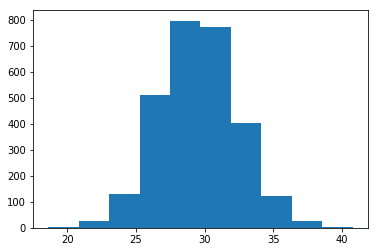

In [113]:
plt.hist(np.random.normal(np.mean(np.arange(25,35)), np.std(np.arange(25,35)), 2800))

In [114]:
#df_1[df_1['age']=='25-34']
import numpy as np

In [117]:
df_1.age.value_counts()

25-34         2800
35-44         2452
18-24         2100
45-54         1850
55-64         1017
65 or more     862
Name: age, dtype: int64

In [128]:
def fill_age_with_normal(df_1):
    a = df_1['age'].values
    m = (a=='65 or more')
    a[m] = np.random.normal(np.mean(np.arange(65,90)),  np.std(np.arange(65,90)), size=862)
    return df_1

In [129]:
fill_age_with_normal(df_1)

,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,Google Ads,Search,Search Keywords,Brand,Audience 4,Video,Video,Desktop,22.7514,0.00,2,0,0.0
1,Google Ads,Search,Search Keywords,Brand,Audience 4,Video,Video,Desktop,27.6932,0.00,5,0,0.0
2,Google Ads,Search,Search Keywords,Brand,Audience 4,Video,Video,Desktop,41.9039,0.00,1,0,0.0
4,Google Ads,Search,Search Keywords,Brand,Audience 4,Video,Video,Desktop,16.5766,53.31,10,2,0.0
5,Google Ads,Search,Search Keywords,Brand,Audience 4,Video,Video,Desktop,26.862,285.38,61,10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16825,Google Ads,Search,Search Keywords,Brand,Audience 4,Video,Video,Desktop,23.8456,1.35,6,3,0.0
16826,Google Ads,Search,Search Keywords,Brand,Audience 4,Video,Video,Desktop,40.795,3.50,3,1,0.0
16828,Google Ads,Search,Search Keywords,Brand,Audience 4,Video,Video,Mobile,20.89,14.76,29,8,0.0
16829,Google Ads,Search,Search Keywords,Brand,Audience 4,Video,Video,Mobile,23.8725,19.88,36,15,0.0


In [153]:
df_1['age']=df_1['age'].astype('int')
df_1['spends']=df_1['spends'].astype('int')
#df_1['link_clicks']=df_1['link_clicks'].astype('int')

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [139]:
df_1.to_excel('cleaned.xlsx',index=False)

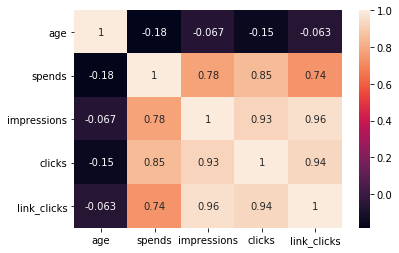

In [136]:
# Plot a heatmap for the new dataframe
sns.heatmap(df_1.corr(),annot=True)

In [140]:
# Converting the dataframe into an array
new_df_array = np.array(df_1)

In [145]:
df_1

,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,Google Ads,Search,Search Keywords,Brand,Audience 4,Video,Video,Desktop,22,0,2,0,0.0
1,Google Ads,Search,Search Keywords,Brand,Audience 4,Video,Video,Desktop,27,0,5,0,0.0
2,Google Ads,Search,Search Keywords,Brand,Audience 4,Video,Video,Desktop,41,0,1,0,0.0
4,Google Ads,Search,Search Keywords,Brand,Audience 4,Video,Video,Desktop,16,53,10,2,0.0
5,Google Ads,Search,Search Keywords,Brand,Audience 4,Video,Video,Desktop,26,285,61,10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16825,Google Ads,Search,Search Keywords,Brand,Audience 4,Video,Video,Desktop,23,1,6,3,0.0
16826,Google Ads,Search,Search Keywords,Brand,Audience 4,Video,Video,Desktop,40,3,3,1,0.0
16828,Google Ads,Search,Search Keywords,Brand,Audience 4,Video,Video,Mobile,20,14,29,8,0.0
16829,Google Ads,Search,Search Keywords,Brand,Audience 4,Video,Video,Mobile,23,19,36,15,0.0


In [176]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
for column in df_1.columns:
    if df_1[column].dtype=='O':
        df_1[column] = labelencoder.fit_transform(df_1[column])


In [177]:
df_1

,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,1,1,1,0,3,2,3,0,22,0,2,0,0.0
1,1,1,1,0,3,2,3,0,27,0,5,0,0.0
2,1,1,1,0,3,2,3,0,41,0,1,0,0.0
4,1,1,1,0,3,2,3,0,16,53,10,2,0.0
5,1,1,1,0,3,2,3,0,26,285,61,10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16825,1,1,1,0,3,2,3,0,23,1,6,3,0.0
16826,1,1,1,0,3,2,3,0,40,3,3,1,0.0
16828,1,1,1,0,3,2,3,1,20,14,29,8,0.0
16829,1,1,1,0,3,2,3,1,23,19,36,15,0.0


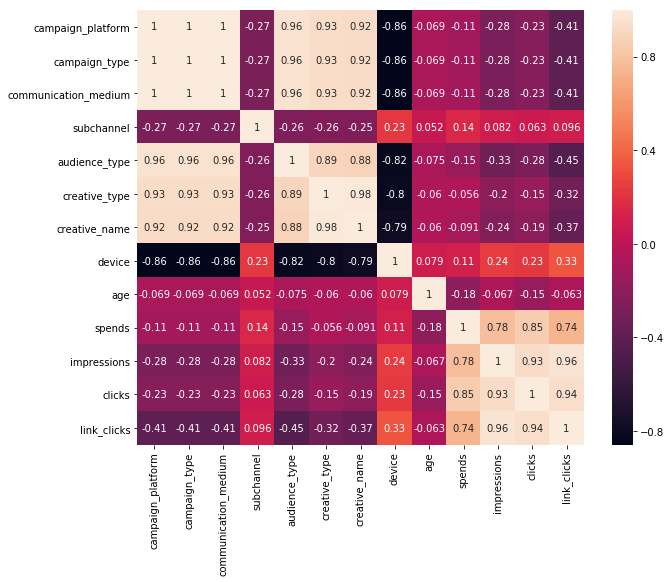

In [180]:
# Plot a heatmap for the new dataframe
plt.figure(figsize=(10,8))
sns.heatmap(df_1.corr(),annot=True)

In [141]:
# Scaling the values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
new_df_array = sc.fit_transform(new_df_array)

ValueError: could not convert string to float: 'Google Ads'

/Applications/Utilities/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/Utilities/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


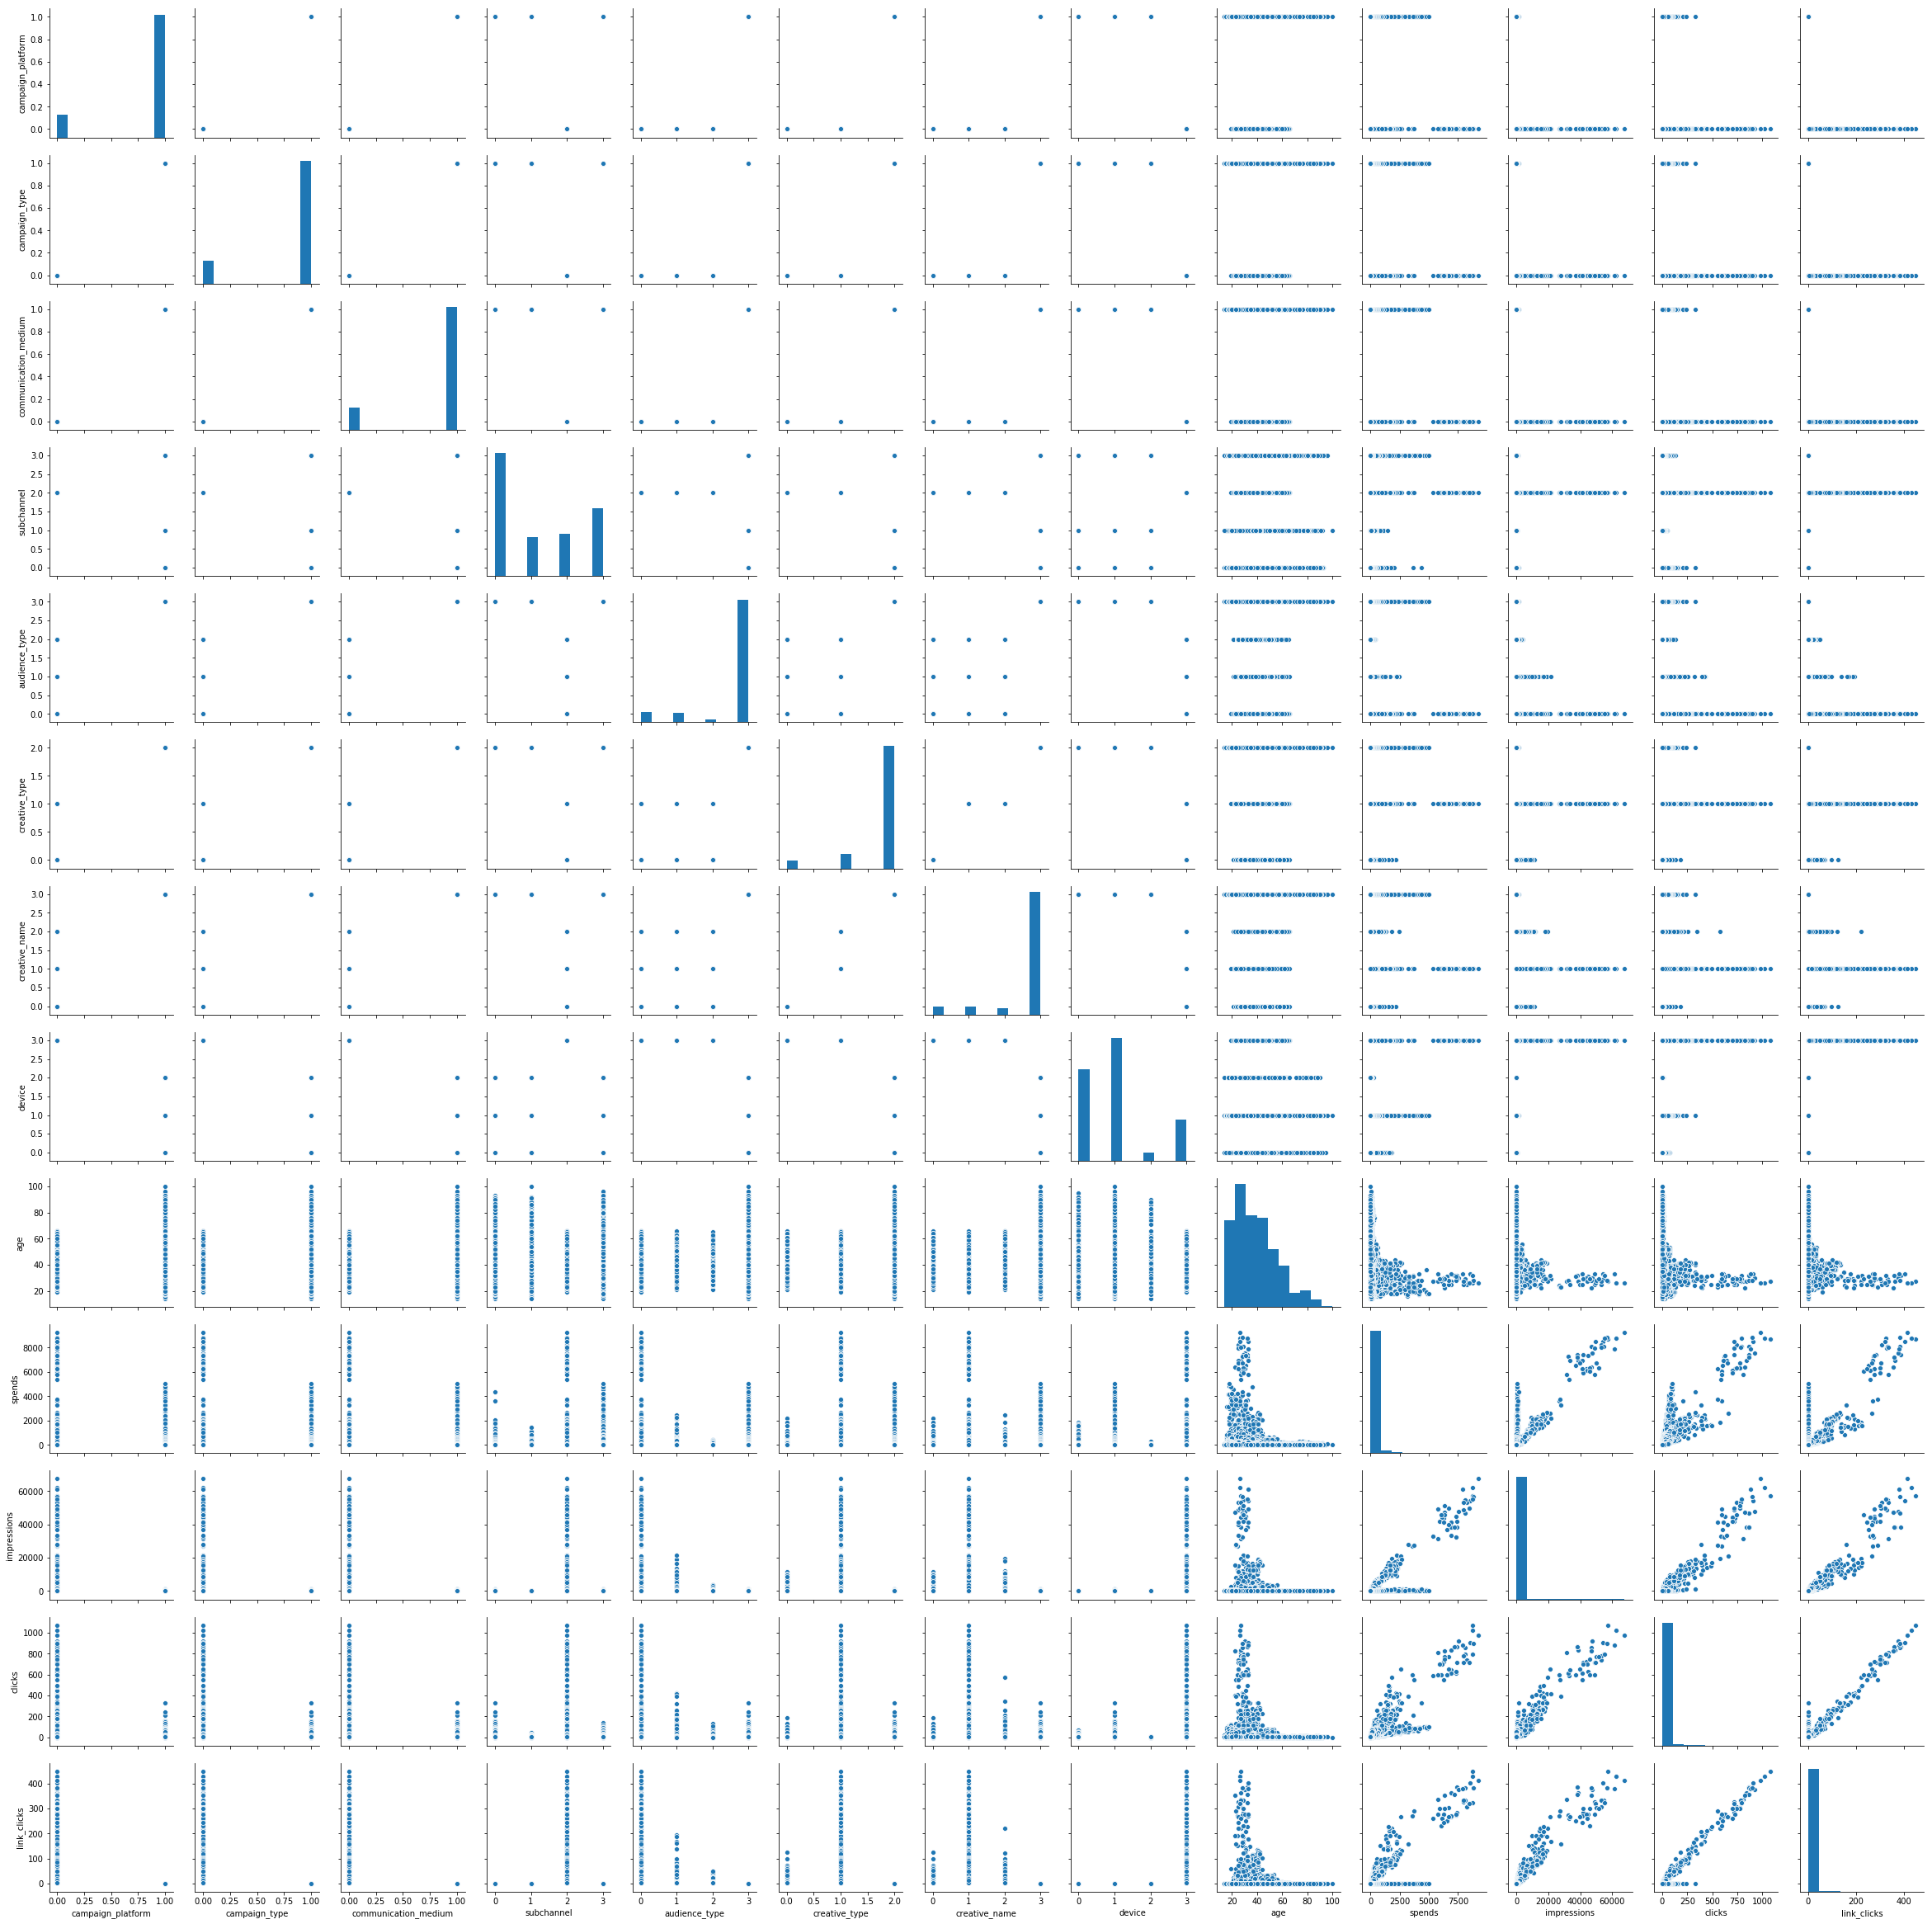

In [182]:
sns.pairplot(df_1)